In [2]:
import torch
from PIL import Image
import requests

import bert_score

# from transformers import Blip2Processor, Blip2ForConditionalGeneration
import random

import pickle
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#os.environ['HF_HOME'] = '/var/scratch/ybi530/data'

device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
print(device)
img_path = '/var/scratch/ybi530/data/data/train2014/'
file_path = '/var/scratch/ybi530/result_Nov/'

cuda


In [3]:
df = pd.read_csv(file_path+'dis_blip_answer_all_L.csv')

In [7]:
accs = []
for i in range(0,30,5):
#     print(i)
    df['answer_prompt_'+str(i)] = df['answer_prompt_'+str(i)].apply(lambda x:x[0])
    acc = len(df[df['answer_prompt_'+str(i)]==df['correct_action']])
    print(acc/len(df))
    accs.append(acc/len(df))

0.5863758882626807
0.5969125214408233
0.5939720656701789
0.5853957363391326
0.5939720656701789
0.5893163440333251


In [9]:
import numpy as np
np.mean(accs),np.std(accs)

(0.5909907702360533, 0.004247521342039875)

In [10]:
df = pd.read_csv(file_path+'dis_blip_answer_all_V.csv')

accs = []
for i in range(0,30,5):
#     print(i)
    df['answer_prompt_'+str(i)] = df['answer_prompt_'+str(i)].apply(lambda x:x[0])
    acc = len(df[df['answer_prompt_'+str(i)]==df['correct_action']])
    print(acc/len(df))
    accs.append(acc/len(df))

0.59470717961284
0.5515804949767213
0.5998529772114678
0.5309973045822103
0.5844155844155844
0.5594217103651066


In [11]:
import numpy as np
np.mean(accs),np.std(accs)

(0.5701625418606551, 0.024771233835737635)

NameError: name 'acc_blip' is not defined

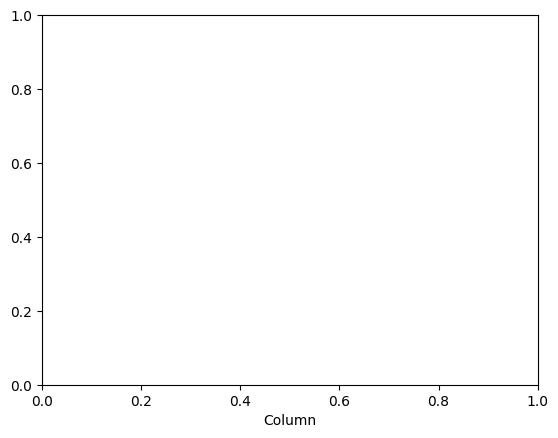

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
ax= plt.gca()
plt.xlabel('Column')
data = [acc_blip,acc_ide,acc_fro,acc_mapl]
g = sns.violinplot( data = data)


desc_type = []
g.set_xticklabels(['intention+target action','intention+vision_decoy action','intention+language_decoy action','intention'
                ])

plt.xlabel('text')
plt.ylabel('CLIP-Score')
plt.title('Distribution of CLIP-Score values per Image text pair')


#  添加平均值和标准差信息
for i in range(len(data)):
    mean_score = round(np.mean(data[i]), 2)
    plt.text( 0.09+i,0.07,mean_score, ha='center', va='bottom')
    plt.text( 0.09+i,1.1,len(data[i]), ha='center', va='bottom')
#     plt.errorbar(desc_type, mean_score, yerr=std_dev, color='black', lw=2)

# 添加图例
# legend_labels = ['target','vis_decoy','lang_decoy','intention','action','vis_action',\
#                   'lang_action','coco']
# plt.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(legend_labels))

plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("paper/image/fig1.pdf", format="pdf")
plt.show()